In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-case-study-hackathon-c57/data_dictionary.csv
/kaggle/input/telecom-churn-case-study-hackathon-c57/sample.csv
/kaggle/input/telecom-churn-case-study-hackathon-c57/starter-notebook - Labs 1.ipynb
/kaggle/input/telecom-churn-case-study-hackathon-c57/train.csv
/kaggle/input/telecom-churn-case-study-hackathon-c57/test.csv


In [4]:
# import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c57/train.csv')
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


# Data understanding, preparation & pre-processing 

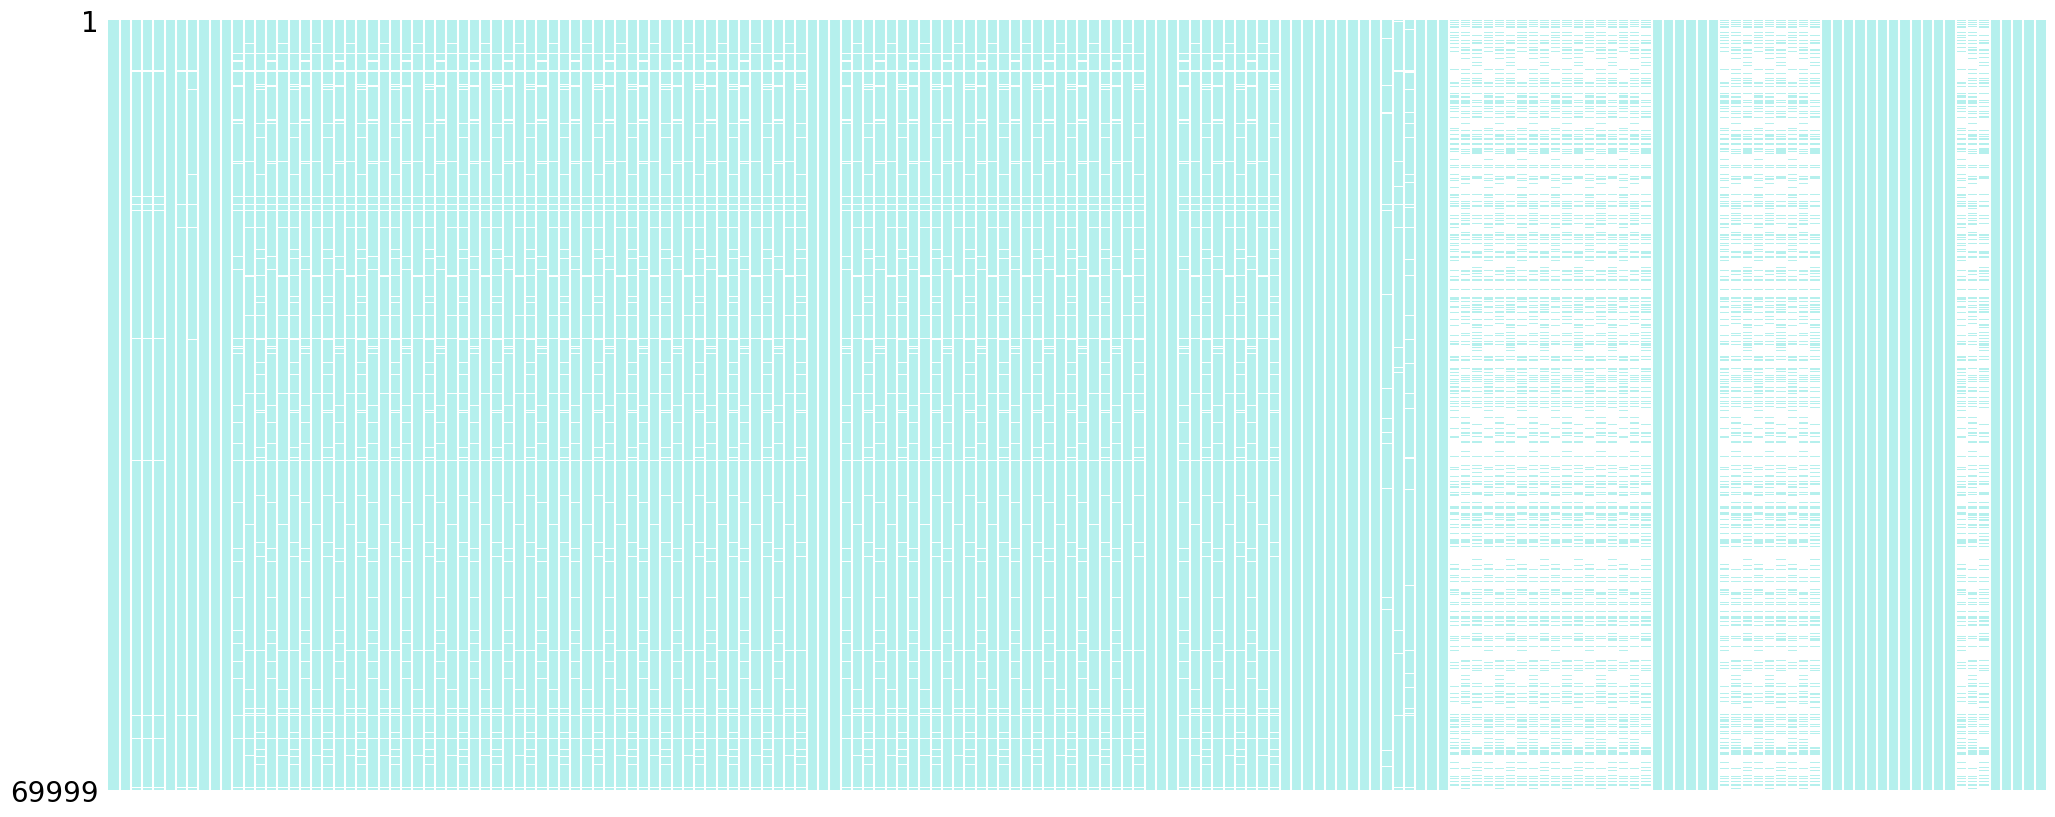

In [7]:
#overview missing data
fig = msno.matrix(train,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> There are many missing data. So I need to check them, then handling before training

In [8]:
# check null ratio
r_null = 100*(train.isnull().sum()/len((train)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(train.columns)}')

number of columns with null values per total columns: 125/172


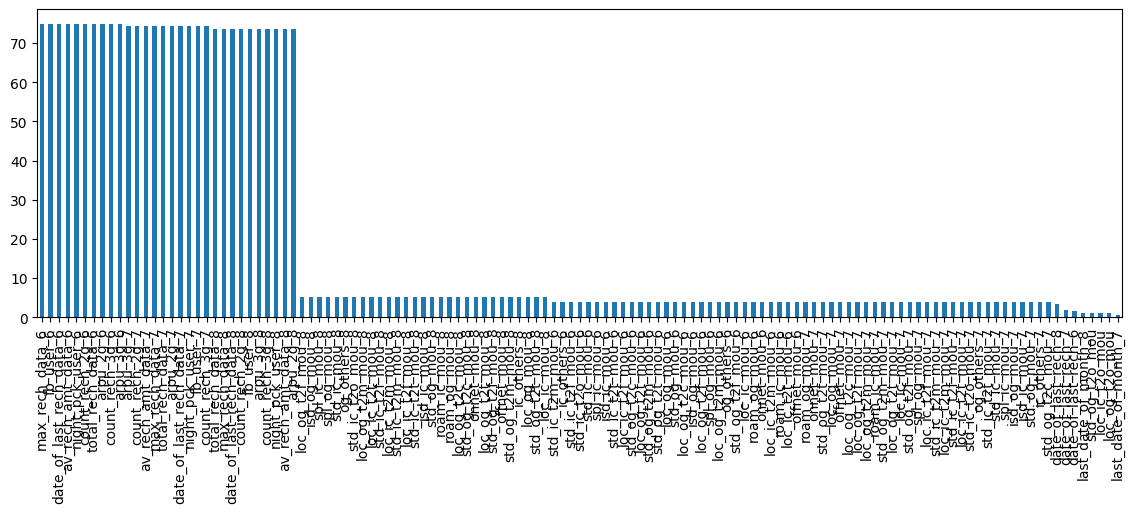

In [9]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [10]:
null_colummns_70 = r_null[r_null > 70].sort_values(ascending = False)
print('number of columns with 70% null values:',len(null_colummns_70))

number of columns with 70% null values: 30


In [11]:
train = train.drop(columns=list(null_colummns_70.index))
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [ ]:
#Drop columns with only one values
columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

In [ ]:
train = train.drop(columns=one_value_column)
train.describe()

In [ ]:
# check duplicate
train_dup = train
train_dup.drop_duplicates(subset = None, inplace= True)
if train_dup.shape == train.shape:
    print('There have no duplicate')
else:
    print('Some duplicate in this dataset')

In [ ]:
#overview missing data
fig = msno.matrix(train,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> With less missing data, I will train 2 versions. The one with using imputation, and the other, I remove all missing data.

In [ ]:
# Imputation version
train_inputation = train
train_inputation = train_inputation.fillna(train_inputation.mode().iloc[0])
#overview missing data
fig = msno.matrix(train_inputation,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()


In [ ]:
# Missing data removing version
train_clean = train
train_clean = train_clean.dropna()
#overview missing data
fig = msno.matrix(train_clean,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

# EDA and Feature Engineering

In [ ]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    
    """
    Returns the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe for which variable names are to be obtained.
        cat_th: int, optional
                Class threshold value for numerical but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numerical variables.
        cat_but_car: list
                List of categorical but cardinal variables.
        num_but_cat: list 
                List of categorical but numerical variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [ ]:
def transfer_date_feature(df):
    for c in df.columns:
        if 'date' in c:
            day_name = f'{c}_day'
            month_name = f'{c}_month'
            year_name = f'{c}_year'
            df[c] = pd.to_datetime(df[c])
            df[year_name] = df[c].dt.year
            df[month_name] = df[c].dt.month
            df[day_name] = df[c].dt.day
            df = df.drop(columns=c)
    return df

In [ ]:
train = transfer_date_feature(train)
train.head()

In [ ]:
# pre-classify type of columns
cat_cols, num_cols, cat_but_car = grab_col_names(train)
fig = train[num_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

> Many bias features. So I decide to use t-SNE instead of PCA

In [ ]:
def univariate_analysis1(df, column):
    _, p = plt.subplots(2,1, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(f'{column}')
    p[1].set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    percentage_of_dropped_row = round((old_rows - new_rows)/old_rows*100,2)
    print('Percentage of dropped row (%): ', percentage_of_dropped_row)
    col_false = None
    if percentage_of_dropped_row < 30:
        return new_df, col_false
    else:
        print(f'WARNING: CANNOT DROP {col} WITH HIGH PERCENTAGE - {percentage_of_dropped_row}')
        col_false = col
        return df, col_false

In [ ]:
# Drop noise features
noise_cols = ['id']
train = train.drop(columns= noise_cols)
# reset grab
cat_cols, num_cols, cat_but_car = grab_col_names(train)

In [ ]:
num_cols

In [ ]:
# plot dist and box
for c in num_cols:
    print('plot feature:', c)
    univariate_analysis1(train, c)

> Many outliers

In [ ]:
#drop outlier
col_falses = []
for c in num_cols:
    print(f'drop outlier for: {c}')
    train, col_false= drop_outliner(train,c)
    if col_false is not None:
        col_falses.append(col_false)

In [ ]:
col_falses

> Consider these features, they can significantly effect the model's performance

In [ ]:
# Check imbalance data
for c in cat_cols:
    sorted_order =train[c].value_counts().index.sort_values()
    ax = sns.countplot(data=train, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

> Many imbalance data, so I decide to use t-SNE to push perforance

In [ ]:
# Some features have only one value, so I remove them one more.
columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

In [ ]:
train = train.drop(columns=one_value_column)
train.describe()

In [ ]:
# Correlative 
sns.heatmap(train.corr(numeric_only=True),cmap="viridis")

> I handle multi-correlative by t-SNE

## Use t-SNE

In [ ]:
list(train.columns)

In [ ]:
y = train['churn_probability']
X = train.drop(columns = 'churn_probability')
print(y.shape)
print(X.shape)


In [ ]:
from sklearn.manifold import TSNE

# Assuming X is your high-dimensional data
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Assuming X_original is your original high-dimensional data
X_combined = np.concatenate((X, X_tsne), axis=1)

In [ ]:
X_tsne.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Example: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def pre_preocessing(df):
    train = df
    train = transfer_date_feature(train)
    # Drop noise features
    noise_cols = ['id']
    train = train.drop(columns= noise_cols)
    cat_cols, num_cols, cat_but_car = grab_col_names(train)
    #drop outlier
#     col_falses = []
#     for c in num_cols:
#         print(f'drop outlier for: {c}')
#         train, col_false= drop_outliner(train,c)
#         if col_false is not None:
#             col_falses.append(col_false)
    # Some features have only one value, so I remove them one more.
    columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
    # columns has only 1  values
    one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
    train = train.drop(columns=one_value_column)
    return train
def tsne_training(df):
#     train = df
    train = pre_preocessing(df)
    y = train['churn_probability']
    X = train.drop(columns = 'churn_probability')
    print(y.shape)
    print(X.shape)
    # Assuming X is your high-dimensional data
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Assuming X_original is your original high-dimensional data
    X_combined = np.concatenate((X, X_tsne), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    # Example: Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")


In [ ]:
tsne_training(train_imputation)

In [ ]:
tsne_training(train_clean)

In [ ]:
df = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c57/train.csv')
tsne_training(df)